## Exploritory Data Analysis Introduction

In [137]:
#%%
import numpy as np 
import pandas as pd 
from scipy.stats import pearsonr
import matplotlib.pyplot as plt
from numpy.polynomial.polynomial import polyfit
import warnings 
warnings.filterwarnings('ignore')

In [138]:
data = pd.read_csv('train_extended.csv')
data.head()


,id,Sex,Length,Diameter,Height,Weight,Shucked Weight,Viscera Weight,Shell Weight,Age
0,0,M,1.5750,1.2250,0.3750,31.226974,12.303683,6.321938,9.638830,10.0
1,1,I,1.2375,1.0000,0.3750,21.885814,7.654365,3.798833,7.654365,19.0
2,2,F,1.4500,1.1625,0.4125,28.250277,11.127179,7.016501,7.257472,11.0
3,3,I,1.3500,1.0250,0.3750,21.588144,9.738053,4.110678,6.378637,9.0
4,4,I,1.1375,0.8750,0.2875,14.968536,5.953395,2.962523,3.713785,8.0


### Calculating Mean Value of Variables

We can start exploring the data by first looking at data for each variable based on categorical values. In this example, we compute the mean for each variable for *male only* crabs. Similar analysis can be done for other categorical values such as crabs classified as female or indeterminate.

In [139]:
data_male_only = data[data['Sex']=='M']
data_female_only = data[data['Sex']=='F']
data_indeterminate_only = data[data['Sex']=='I']

# Change the dataset based on what is being evaluated
print("Male Only Data", "\n")

for var in data_male_only.columns[2:10]:

    var_data = data_male_only[var]
    var_data = np.array(var_data)

    # Calculate average using NumPy's in-built functions
    avg = np.mean(var_data)

    print('Variable {} Average: {:.3f}'.format(var, avg))



Male Only Data 

Variable Length Average: 1.434
Variable Diameter Average: 1.122
Variable Height Average: 0.383
Variable Weight Average: 28.230
Variable Shucked Weight Average: 12.226
Variable Viscera Weight Average: 6.101
Variable Shell Weight Average: 8.039
Variable Age Average: 10.935


### Calculating Correlation Between Variables
Now that we have a basic understanding of the data, let's look for correlations between different variables. Since we want to predict the average age, we'll experiment with data from columns 3 to 9 ('length' through 'shell weight') as our X variable and set age as the Y variable. We use Pearson R to find the correlation coefficient.

In [140]:
y = data['Age']
X = data.drop(['id','Sex','Age'],axis=1)

print("Correlation Coefficients", "\n")
for var in X.columns:
    corr, _ = pearsonr(X[var],y)

    print('{}: {:.3f}'.format(var, corr))


Correlation Coefficients 

Length: 0.623
Diameter: 0.631
Height: 0.663
Weight: 0.614
Shucked Weight: 0.504
Viscera Weight: 0.584
Shell Weight: 0.684


### Visualizing Data

We can use the scatterplot from Matplotlib to visualize the data.

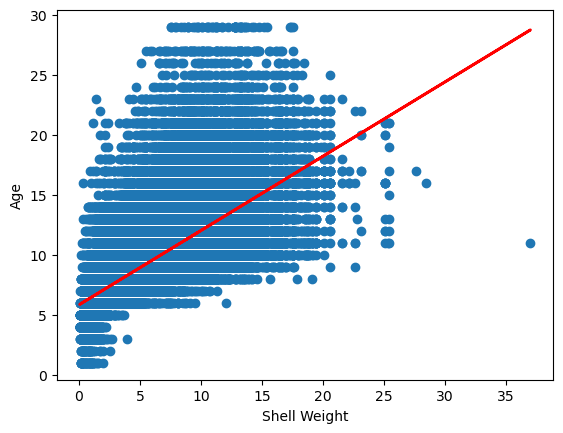

In [142]:
X_shell_weight = X['Shell Weight']

# Find line of best fit
b, m = polyfit(X_shell_weight, y, 1)

plt.scatter(X_shell_weight, y)

plt.plot(X_shell_weight, b + m * X_shell_weight, color = 'red', linestyle = '-', linewidth = 2)
plt.xlabel("Shell Weight")
plt.ylabel("Age")
plt.show()